In [70]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [71]:
# Reading the CSV file into a pandas dataframe
df = pd.read_csv("C:/Users/pruth/OneDrive/Desktop/Projects/Housing-Price-Prediction/Clean_Data.csv")
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2


In [72]:
# Count the number of unique values in each column
unique_counts = df.nunique()

print(unique_counts)

area_type          4
availability      78
location        1259
total_sqft      1886
bath              16
balcony            4
price           1921
bhk               16
dtype: int64


In [73]:
# Adding price per square feet column

df['price_per_sqft']=(df['price']*100000/df['total_sqft']).round()

In [74]:
# Location column has 1259 unique values. This is quite large and is not favourable for encoding.
# Hence reducing the number of unique values by combining similar values

df['location']=df['location'].apply(lambda x:x.strip())

In [75]:
#Replacing the locations of columns with less than 10 value_counts to the "Others" category to reduce the unique count

df['location']=df['location'].apply(lambda x:'Others'if x in df['location'].value_counts()[df['location'].value_counts()<=10] else x)
df.sample(10)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
8709,Built-up Area,18-Dec,Bommasandra Industrial Area,1160.0,2.0,1.0,33.51,2,2889.0
2221,Plot Area,Ready To Move,Banashankari Stage III,2400.0,4.0,1.0,240.00,4,10000.0
8870,Built-up Area,Ready To Move,Bhoganhalli,2439.0,5.0,2.0,170.00,4,6970.0
10164,Super built-up Area,Ready To Move,Giri Nagar,1200.0,3.0,0.0,175.00,6,14583.0
7868,Built-up Area,Ready To Move,Yelahanka New Town,1209.0,2.0,3.0,65.00,3,5376.0
1206,Super built-up Area,Ready To Move,Whitefield,1140.0,2.0,2.0,41.00,2,3596.0
4183,Super built-up Area,Ready To Move,BTM 2nd Stage,1200.0,2.0,0.0,35.00,2,2917.0
10680,Plot Area,18-May,Kaikondrahalli,1200.0,4.0,2.0,125.00,4,10417.0
7305,Super built-up Area,Ready To Move,Hormavu,1350.0,2.0,2.0,45.00,2,3333.0
3037,Plot Area,Ready To Move,Others,1200.0,3.0,0.0,200.00,3,16667.0


In [76]:
df['location'].value_counts()

location
Others                  2808
Whitefield               497
Sarjapur  Road           352
Electronic City          287
Kanakpura Road           236
                        ... 
Karuna Nagar              11
Nagasandra                11
Vishveshwarya Layout      11
LB Shastri Nagar          11
Mico Layout               11
Name: count, Length: 226, dtype: int64

In [77]:
# Visiting the Numeric Features to identify any descrepencies

df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,12143.0,1520.562387,1183.122889,5.0,1100.0,1265.0,1650.0,52272.0
bath,12143.0,2.629993,1.238239,1.0,2.0,2.0,3.0,40.0
balcony,12143.0,1.583628,0.822034,0.0,1.0,2.0,2.0,3.0
price,12143.0,107.523924,134.079656,8.0,50.0,70.0,115.0,2912.0
bhk,12143.0,2.748579,1.218286,1.0,2.0,3.0,3.0,43.0
price_per_sqft,12143.0,6952.223503,23109.355033,268.0,4275.0,5417.0,7228.5,2300000.0


In [78]:
# 1.TOTAL_SQFT :The total_sqft seems to be very low in some cases
# In general a 1 BHK flat has an area of 350 sqft 

df.total_sqft.sort_values()

4634         5.0
333         11.0
964         15.0
1056        24.0
5542        45.0
          ...   
11856    30400.0
640      35000.0
5090     36000.0
5022     42000.0
1777     52272.0
Name: total_sqft, Length: 12143, dtype: float64

In [79]:
# Dropping rows with less than 350 sqft

df.drop(df[df['total_sqft']<350].index,inplace=True)

In [80]:
df.total_sqft.sort_values()

11395      350.0
3495       350.0
2402       351.0
7824       360.0
6093       360.0
          ...   
11856    30400.0
640      35000.0
5090     36000.0
5022     42000.0
1777     52272.0
Name: total_sqft, Length: 12129, dtype: float64

PRICE PER SQFT 
 1777        268.0
640         371.0
5022        417.0
10748       500.0
6700        574.0
           ...   
1478      50000.0
7283      53150.0
5948      76531.0
6560      76923.0
7071     176471.0
Name: price_per_sqft, Length: 12129, dtype: float64


<Axes: >

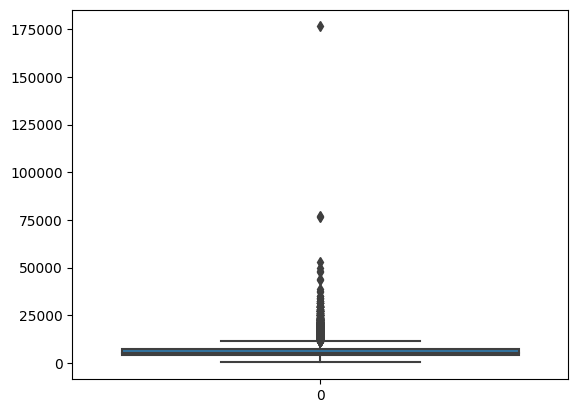

In [81]:
# 2. PRICE_PER_SQFT : We observe some exhorbitent high prices that can be considered as Outliers
# We will remove the Outliers by comparing the price_per_sqft with the mean price_per_sqft of each location

print("PRICE PER SQFT",'\n',df.price_per_sqft.sort_values())
display(sns.boxplot(df['price_per_sqft']))

In [82]:
def price_outlier_treatment(data):
    df_output = pd.DataFrame()
    for key,sub_df in data.groupby('location'):
        # calculating mean and std-deviation of price_per_sqft for each location
        mean = np.mean(sub_df.price_per_sqft)
        sd = np.std(sub_df.price_per_sqft)
        # filtering the observations lying between 1.5 std-devs.
        filtered_df=sub_df[(sub_df.price_per_sqft >= (mean-1*sd)) & (sub_df.price_per_sqft <= (mean+1*sd))]
        df_output = pd.concat([df_output,filtered_df],ignore_index=True)
    return df_output

In [83]:
# Treating the outliers in the data by using the price_outlier_treatment() Function
df=price_outlier_treatment(df)
df.describe().T

# We Observe that the max price per sqft has significantly reduced from 2300000 to 24000
# And the minimum has increased from 268 to 1600

,count,mean,std,min,25%,50%,75%,max
total_sqft,9992.0,1459.342447,783.114242,350.0,1100.00,1265.0,1614.00,30400.0
bath,9992.0,2.503102,1.060945,1.0,2.00,2.0,3.00,27.0
balcony,9992.0,1.585168,0.806187,0.0,1.00,2.0,2.00,3.0
price,9992.0,89.350847,79.895632,10.0,49.11,68.0,100.00,2200.0
bhk,9992.0,2.618695,1.015899,1.0,2.00,2.0,3.00,27.0
price_per_sqft,9992.0,5802.781825,2400.904217,1600.0,4286.00,5242.0,6592.25,24000.0


PRICE/SQFT after Outlier Treatment  
 6703     1600.0
6677     1641.0
6658     1900.0
6411     1938.0
7170     2000.0
         ...   
34      20833.0
701     21250.0
1612    22297.0
1611    23719.0
1620    24000.0
Name: price_per_sqft, Length: 9992, dtype: float64


<Axes: >

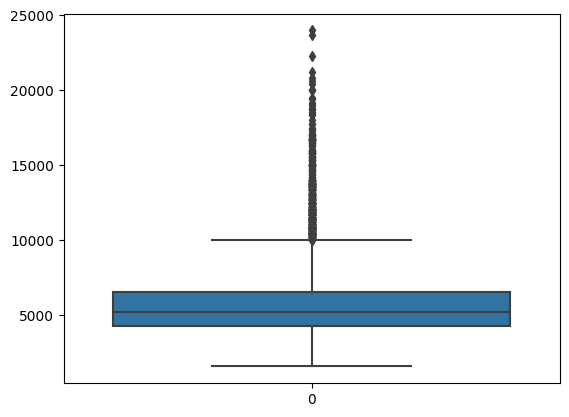

In [84]:
print("PRICE/SQFT after Outlier Treatment ",'\n',df.price_per_sqft.sort_values())
display(sns.boxplot(df['price_per_sqft']))

BHK 
 4739     1
6843     1
1969     1
5000     1
6846     1
        ..
5185    11
5828    11
6924    13
6017    14
5424    27
Name: bhk, Length: 9992, dtype: int64


<Axes: >

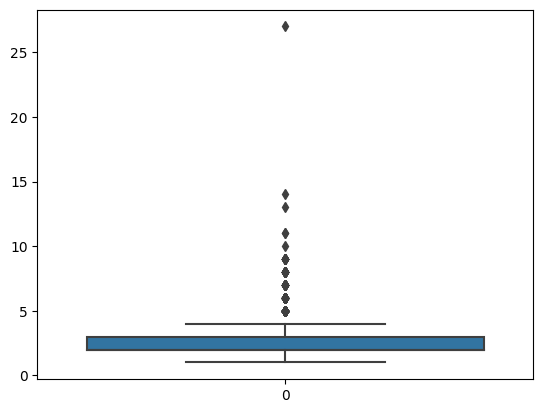

In [85]:
# 3. BHK : We can observe that BHK column has some potential outliers as the range is 1 to 27
# Where in the same case the 3rd Quartile is 3.

print("BHK","\n",df.bhk.sort_values())
display(sns.boxplot(df['bhk']))

In [86]:
# Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR)
Q1 = df['bhk'].quantile(0.25)
Q3 = df['bhk'].quantile(0.75)
IQR = Q3 - Q1

# Filter the dataframe to exclude outliers
df = df[(df['bhk'] >= Q1 - 7.5 * IQR) & (df['bhk'] <= Q3 + 7.5 * IQR)]
df = df.reset_index(drop=True)


BHK 
 6751     1
423      1
7417     1
8409     1
6482     1
        ..
6309     9
3535     9
5461     9
4267     9
4860    10
Name: bhk, Length: 9987, dtype: int64


<Axes: >

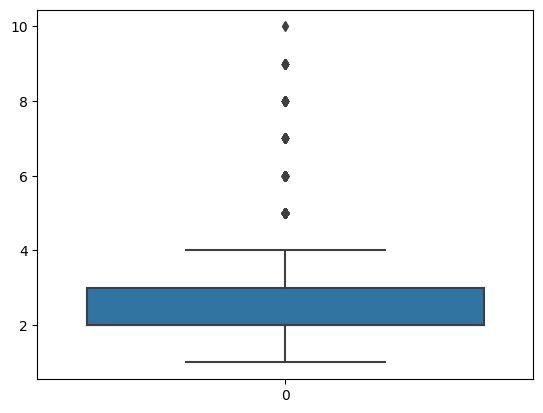

In [87]:
#Result

print("BHK","\n",df.bhk.sort_values())
display(sns.boxplot(df['bhk']))

In [88]:
# 4. Bath: It is unusual to have 2 more bathrooms than number of bedrooms in a home

df = df[df.bath<df.bhk+2]
df.shape

(9892, 9)

In [89]:
# Dropping columns that won't help with model building :

df.drop(['price_per_sqft','availability','area_type','balcony'],axis=1,inplace=True)

In [90]:
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,930.0,4.0,85.0,7


In [91]:
dummies = pd.get_dummies(df.location)
dummies = dummies.astype(int)
df = pd.concat([df,dummies.drop('Others',axis='columns')],axis='columns')
df.drop('location',axis='columns',inplace=True)
df.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,85.0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Saving Cleaned data file in csv format
df.to_csv("C:/Users/pruth/OneDrive/Desktop/Projects/Housing-Price-Prediction/FeatureEngineered_Data.csv", index=False)